# Clasificador de imágenes de perros y gatos con CNN 

## Explorando los datos
Se descargan los datos en un fichero zip con 2000 imágenes de perros y gatos. Se descarga el zip y se extraen el directorio /tmp de la máquina virtual local. Estos datos son un subconjunto de 
["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) disponible en Kaggle.

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-10 13:35:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.33.208, 172.253.62.128, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.33.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   120MB/s    in 0.5s    

2021-09-10 13:35:02 (120 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Los contenidos del zip son extraídos en el directorio `/tmp/cats_and_dogs_filtered`, conteniendo los directorios `train` and `validation`, los cuales a su vez contienen los subdirectorios `train` and `validation`.

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio con las imágenes de entrenamiento de la categoría gato 
train_cats_dir = os.path.join(train_dir, 'cats')

# Directorio con las imágenes de entrenamiento de la categoría perro 
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imágenes de validación de la categoría gato 
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directorio con las imágenes de validación de la categoría perro 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Visualizando los nombres de las imágenes en los diferentes directorios.

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.613.jpg', 'cat.647.jpg', 'cat.536.jpg', 'cat.764.jpg', 'cat.609.jpg', 'cat.911.jpg', 'cat.806.jpg', 'cat.471.jpg', 'cat.34.jpg', 'cat.228.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Número total de imágenes en cada categoría y directorio.

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


Para gatos y perro hay 1000 imágenes en el entrenamiento y 500 en la validación.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parámetros de la imagen, configuración 4x4 
nrows = 4
ncols = 4

# Indice sobre las imágenes.
pic_index = 0

Se muestran 8 imágenes de cada tipo.

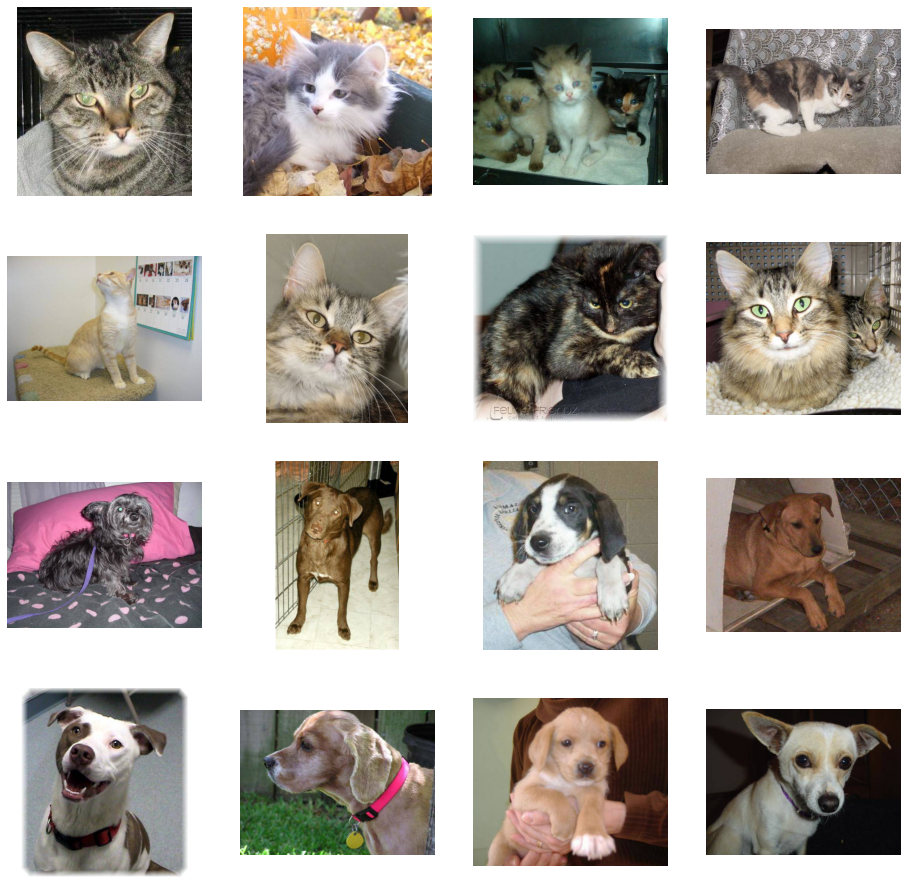

In [ ]:
# Mostrar algunas imágenes
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Definición de la CNN 

Las imágenes color se escalan a tamaño image_size X image_size píxeles, aunque en realidad son objetos 150x150x3 debido a los 3 colores RGB.

In [ ]:
#Se configura el tamaño de las imágenes.
image_size=150

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Capa de entrada de datos: image_size x image_size x 3
img_input = layers.Input(shape=(image_size, image_size, 3))

# Bloque convolucional formado por: 
# Capa convolucional con 16 filtros y tamaño 3x3.
# Capa max-pooling de tamaño 2x2.
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Bloque convolucional formado por: 
# Capa convolucional con 32 filtros y tamaño 3x3.
# Capa max-pooling de tamaño 2x2.
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Bloque convolucional formado por: 
# Capa convolucional con 64 filtros y tamaño 3x3.
# Capa max-pooling de tamaño 2x2.
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Bloque convolucional formado por: 
# Capa convolucional con 64 filtros y tamaño 3x3.
# Capa max-pooling de tamaño 2x2.
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# En todos las capas anteriores se utiliza la función
# de activación relu.

# A continuación se añaden dos capas densas, 
# la primera de las cuales tiene una función de activación relu. 
# Finalmente la capa de salida tiene una sola neurona para producir 
# un único escalar con función de activación sigmoide para producir 
# una salida en el rango entre 0 y 1.

# Se aplana el objeto de forma que en vez se tener un tensor 3D sea 1D.
x = layers.Flatten()(x)

# Capa densa con función de activación relu.
x = layers.Dense(32, activation='relu')(x)

# Capa de salida de una única neurona y función de activación sigmoide.
output = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
# Crear el modelo:
model = Model(img_input, output)

In [ ]:
# Entrenar el modelo.
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imágenes se reescalan en 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# El flujo de imágenes de entrenamiento usando grupos de 20
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Directorio donde encontrar el conjunto de entremianto
        target_size=(image_size, image_size),  # Reescalar imágenes a 150x150
        batch_size=20,
        # Puesto que el error es la entropia cruzada binaria, se necesitan etiquetas binarias
        class_mode='binary') 

# El flujo de imágenes de validación usando grupos de 20
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=20,
        shuffle=False, # El conjunto de validación no se baraja
        class_mode='binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Entrenamiento

In [ ]:
history=model.fit(train_generator, epochs=4, batch_size=32, validation_data=validation_generator, verbose=1)

Epoch 1/4
100/100 [==============================] - 51s 499ms/step - loss: 0.6912 - acc: 0.5350 - val_loss: 0.6751 - val_acc: 0.5700
Epoch 2/4
100/100 [==============================] - 49s 495ms/step - loss: 0.6570 - acc: 0.6315 - val_loss: 0.5758 - val_acc: 0.6920
Epoch 3/4
100/100 [==============================] - 49s 494ms/step - loss: 0.5967 - acc: 0.6810 - val_loss: 0.5870 - val_acc: 0.7020
Epoch 4/4
100/100 [==============================] - 50s 496ms/step - loss: 0.5463 - acc: 0.7265 - val_loss: 0.5713 - val_acc: 0.6960


## Visualización de las representaciones intermedias

Se visualiza las características intermedias aprendidas por la CNN. Se puede observar como la entrada se transforma al pasar através de las capas. Se selecciona una imagen aleatoria del conjunto de entrenamiento y se visualiza durante su transformación. Cada fila corresponde con una capa y cada imagen en la fila con un filtro. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


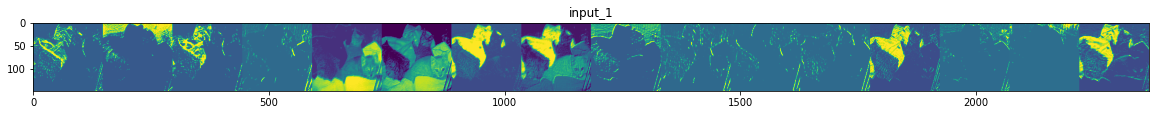

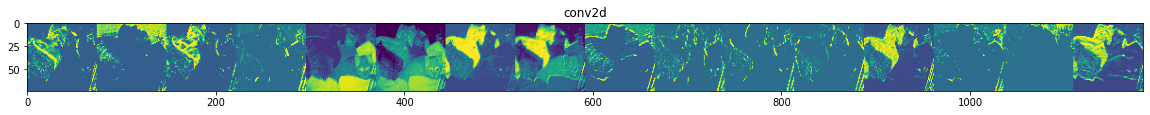

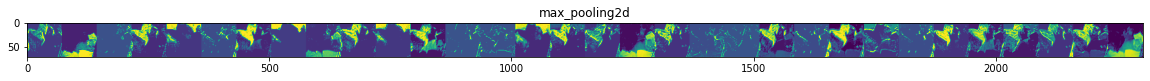

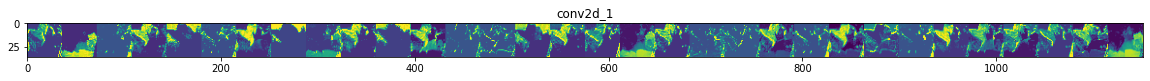

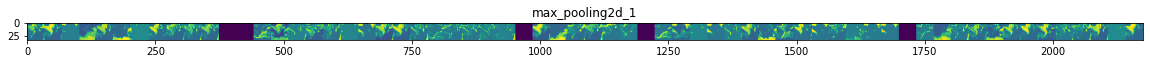

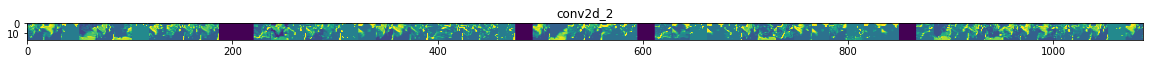

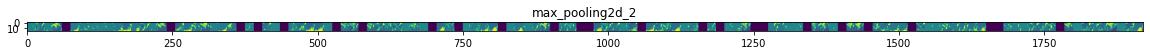

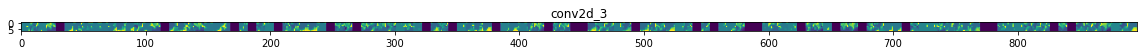

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Se define un nuevo modelo que tendrá como entrada la imagen, 
# y como salida la representación intermedia de todas las capas. 
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Se elige aleatoriamente una imagen del conjunto de entrenamiento.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(image_size, image_size))  # this is a PIL image
x = img_to_array(img)  # Array Numpy array con dimensiones (image_size, image_size, 3)
x = x.reshape((1,) + x.shape)  # Array Numpy array con dimensiones (1, image_size, image_size, 3)

# Reescalar por 1/255
x /= 255

# Se hace pasar la imagen através de la red. 
# Así se obtienen sus presentaciones intermedias. 
successive_feature_maps = visualization_model.predict(x)

# Se obtienen los nombres de las capas. 
layer_names = [layer.name for layer in model.layers]

# Dibjar representaciones
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Hacer con las capas convolucionales y max-pooling, pero no con las densas
    n_features = feature_map.shape[-1]  # número de características en un mapa
    # El mapa tiene dimensiones (1, size, size, n_features)
    size = feature_map.shape[1]
    # Título en las imágenes 
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Reprocesar para hacer visualizable 
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # Horizontal display 
      display_grid[:, i * size : (i + 1) * size] = x
    # Mostrar 
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Evaluar la calidad del modelo

### Error y exactitud.
Se representan el error y la exactitud para los conjuntos de entrenamiento y validación.

Text(0.5, 1.0, 'Training and validation loss')

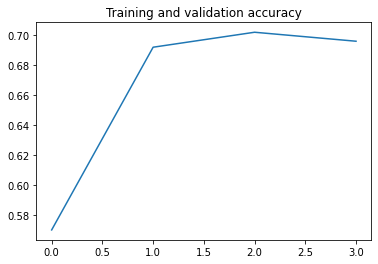

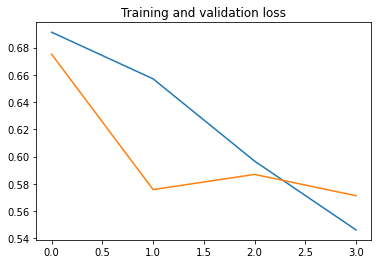

In [ ]:
# Se recuperan el error y la exactitud de los conjuntos de 
# entrenamiento y validación 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Número de épocas
epochs = range(len(acc))

# Representación de la exactitud por época de los conjutos de 
# entrenamiento y validación plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Representación del error por época de los conjutos de 
# entrenamiento y validación 
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
Y_pred = model.predict(validation_generator)

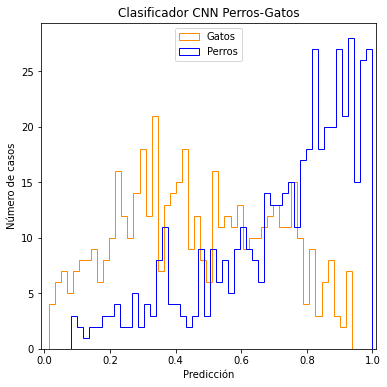

In [ ]:
# Visualización de los pronósticos.
plt.figure(1,figsize=(6,6)) 
plt.style.use('seaborn-deep') 
plt.hist(Y_pred[:500],50,histtype='step',color='darkorange', label= "Gatos")
plt.hist(Y_pred[500:],50,histtype='step',color='blue', label= "Perros")
plt.ylabel('Número de casos')
plt.xlabel('Predicción')
plt.title("Clasificador CNN Perros-Gatos")
plt.xlim(-0.01,1.01)
plt.legend( loc='upper center')

#from google.colab import files
#plt.savefig('ClasificadorCNNPerrosGatos.eps')
#files.download('ClasificadorCNNPerrosGatos.eps') # Descomentar para descargar localmente

### Matrix de confusión
La matrix de confusión es un sistema para evaluar la calidad de la predicción en resultados categóricos. 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Se generan las etiquetas de las imágenes del conjunto de validación. Primero los valores numéricos del pronósitico, el cual es separado en dos vectores iguales. La primera mitad corresponde a los gatos y la segunda mitad a los perros. Finalmente se transforma los valores numéricos en el rango de 0 a 1, en etiquetas 0 ó 1, en función si es menor o mayor de 0.5. Este umbral es completamente arbitrario.

In [ ]:
Y_pred_cats=Y_pred[:500]
Y_pred_dogs=Y_pred[500:]

In [ ]:
Y_pred[Y_pred<=0.5] = 0
Y_pred[Y_pred>0.5] = 1

Se construye el vector que corresponde con las etiquetas originales del conjunto de validación

In [ ]:
Y_label_ori= np.zeros(len(Y_pred))
Y_label_ori[500:]=1

In [ ]:
cm=confusion_matrix(Y_label_ori, Y_pred)
print(cm)

[[279 221]
 [ 83 417]]


In [ ]:
# Trues
TP = cm[1,1]; print(TP)
TN = cm[0,0]; print(TN)
# Falses
FP = cm[0,1]; print(FP)  
FN = cm[1,0]; print(FN)

417
279
221
83


In [ ]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity or true positive rate',TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('Specificity or true negative rate',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print('Precision or positive predictive value',np.round(PPV,3))
# Negative predictive value
NPV = TN/(TN+FN)
print('Negative predictive value',np.round(NPV,3))
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('False positive rate',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('False negative rate',FPR)
# False discovery rate
FDR = FP/(TP+FP)
print('False discovery rate',FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Accuracy',ACC)

Sensitivity or true positive rate 0.834
Specificity or true negative rate 0.558
Precision or positive predictive value 0.654
Negative predictive value 0.771
False positive rate 0.442
False negative rate 0.442
False discovery rate 0.3463949843260188
Accuracy 0.696


## Propuestas adicionales.

*   Observar el sobreajuste producido si se sube el número de época, por ejemplo a 25. 
*   Modificar el número de filtros y bloques convolucionales para mejorar el rendimiento de la red. 
*   Si el tamaño de las imágenes se hace mucho más pequeño, cómo cambia el rendimiento del clasificador. ¿Y en la dirección contraria? 


